## 6. ロジスティック回帰など

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

np.random.seed(160)

d = pd.read_csv("data4a.csv",dtype={"y": int,"x":float, "f":"category"})

In [3]:
d.head()

,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


In [4]:
d.describe()

,N,y,x
count,100.0,100.000000,100.000000
mean,8.0,5.080000,9.967200
std,0.0,2.743882,1.088954
min,8.0,0.000000,7.660000
25%,8.0,3.000000,9.337500
50%,8.0,6.000000,9.965000
75%,8.0,8.000000,10.770000
max,8.0,8.000000,12.440000


In [5]:
d.f.describe()

count     100
unique      2
top         T
freq       50
Name: f, dtype: object

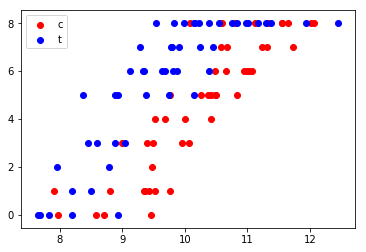

In [6]:
x_c = d.x[d.f == "C"]
y_c = d.y[d.f == "C"]

x_t = d.x[d.f == "T"]
y_t = d.y[d.f == "T"]

plt.scatter(x_c,y_c,c="red",label="c")
plt.scatter(x_t,y_t,c="blue",label="t")
plt.legend()
plt.show()

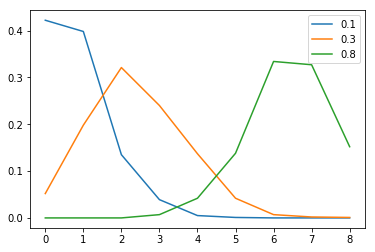

In [7]:
q_list = [0.1,0.3,0.8]
p_dicts =dict()
for q in q_list:
    p_dict = dict()
    for i in range(0,9):
        p_dict.update({i:0})
    for _ in range(1000):
        rnd = np.random.binomial(8,p=q)
        p_dict[rnd] += 1
    
    for i in range(0,9):
        p_dict[i] /= 1000
        
    p_dicts.update({q: p_dict})

for param,dictionary in p_dicts.items():
    plt.plot(list(dictionary.keys()),list(dictionary.values()),label=str(param))
    
plt.legend()

In [8]:
def sigmoid(x):
    return 1 /(1+np.exp(-x))
x = np.arange(-6,6,0.1)
y = sigmoid(x)

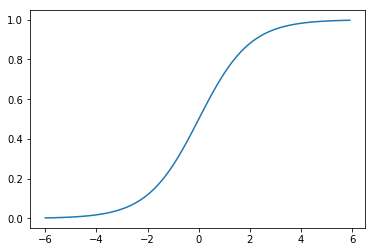

In [9]:
plt.plot(x,y)

In [10]:
d.head()

,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C


In [11]:
d.shape

(100, 4)

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.glm('y + I(N-y)~ x + f',data=d,family=sm.families.Binomial())

In [13]:
result = model.fit()

In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Wed, 04 Apr 2018   Deviance:                       123.03
Time:                        11:01:30   Pearson chi2:                     13.7
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.000     -22.307     -16.765
f[T.T]         2.0215      0.231      8.740      0.000       1.568       2.475
x              1.9524      0.139     14.059      0.000       1.680       2.225
==============================================================================
"""

In [15]:
df_test_c = pd.DataFrame()
df_test_c["x"] = np.linspace(7,12,100)
df_test_c["f"] = "C"
predict_c = result.predict(df_test_c)*8

df_test_t = pd.DataFrame()
df_test_t["x"] = np.linspace(7,12,100)
df_test_t["f"] = "T"
predict_t = result.predict(df_test_t)*8

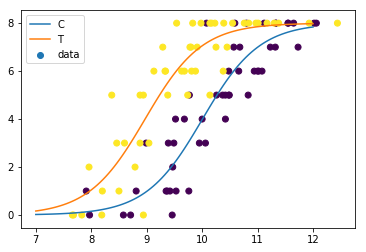

In [16]:
plt.plot(df_test_c.x,predict_c,label="C")
plt.plot(df_test_t.x,predict_t,label="T")
plt.scatter(d.x,d.y,c=d.f.cat.codes,label="data")
plt.legend()

In [17]:
formula_list = ['y + I(N-y)~ 1','y + I(N-y)~ f','y + I(N-y)~ x','y + I(N-y)~ x+f']

for formula in formula_list:
    model = smf.glm(formula,data=d,family=sm.families.Binomial())
    result = model.fit()
    print(formula,-2*(result.llf - (result.df_model+1)))

y + I(N-y)~ 1 644.4093416623778
y + I(N-y)~ f 637.7597534566678
y + I(N-y)~ x 364.345443283716
y + I(N-y)~ x+f 272.2111292852233


In [18]:
model = smf.glm('y + I(N-y)~ 1',data=d,family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -321.20
Date:                Wed, 04 Apr 2018   Deviance:                       499.23
Time:                        11:02:09   Pearson chi2:                     50.2
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5537      0.073      7.540      0.000       0.410       0.698
==============================================================================
"""

In [19]:
model = smf.glm('y + I(N-y)~ x',data=d,family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -180.17
Date:                Wed, 04 Apr 2018   Deviance:                       217.17
Time:                        11:02:16   Pearson chi2:                     23.1
No. Iterations:                     5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.7785      1.077    -12.789      0.000     -15.890     -11.667
x              1.4626      0.111     13.214      0.000       1.246       1.680
==============================================================================
"""

In [20]:

model = smf.glm('y + I(N-y)~ f',data=d,family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -316.88
Date:                Wed, 04 Apr 2018   Deviance:                       490.58
Time:                        11:02:25   Pearson chi2:                     49.9
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3433      0.101      3.383      0.001       0.144       0.542
f[T.T]         0.4335      0.148      2.930      0.003       0.144       0.723
==============================================================================
"""

In [21]:
model = smf.glm('y + I(N-y)~ x*f',data=d,family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Wed, 04 Apr 2018   Deviance:                       122.43
Time:                        11:02:32   Pearson chi2:                     13.6
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5233      1.886     -9.821      0.000     -22.220     -14.827
f[T.T]        -0.0638      2.704     -0.024      0.981      -5.363       5.235
x              1.8525      0.186      9.983      0.000       1.489       2.216
x:f[T.T]       0.2163      0.280      0.772      0.440      -0.333       0.765
==============================================================================
"""

In [22]:
aic = -2*(result.llf - (result.df_model+1))
aic

273.6105967259739

In [23]:
d = pd.read_csv("data4b.csv")

In [24]:
d.head()

,y,x,A
0,57,0.68,10.3
1,64,0.27,15.6
2,49,0.46,10.0
3,64,0.45,14.9
4,82,0.74,14.0


In [25]:
model = smf.glm('y~x',offset=np.log(d.A),data=d,family=sm.families.Poisson())

In [26]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -323.17
Date:                Wed, 04 Apr 2018   Deviance:                       81.608
Time:                        11:03:05   Pearson chi2:                     81.5
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9731      0.045     21.600      0.000       0.885       1.061
x              1.0383      0.078     13.364      0.000       0.886       1.191
==============================================================================
"""

Text(0,0.5,'y')

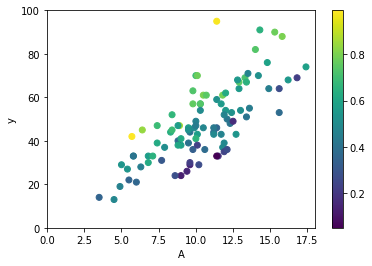

In [27]:

plt.scatter(d.A,d.y,c=d.x)
plt.colorbar()
plt.xlim(0,18)
plt.ylim(0,100)
plt.xlabel("A")
plt.ylabel("y")

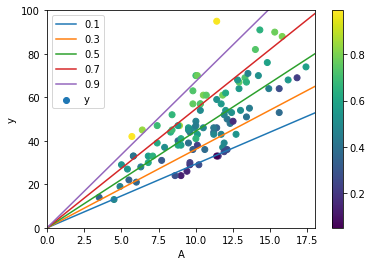

In [28]:
df_predict = pd.DataFrame()
df_predict["x"] = 0
df_predict["A"] = np.arange(0.1,20,0.1)
x_list = [0.1,0.3,0.5,0.7,0.9]

plt.scatter(d.A,d.y,c=d.x)
plt.colorbar()
plt.xlim(0,18)
plt.ylim(0,100)
plt.xlabel("A")
plt.ylabel("y")
for x in x_list:
    df_predict["x"] = x
    # predict内にてoffsetの設定必要。
    plt.plot(df_predict.A,result.predict(df_predict,offset=np.log(df_predict.A)),label=x)
plt.legend()

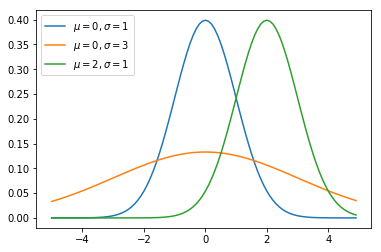

In [29]:
import scipy.stats as sct
y = np.arange(-5,5,0.1)
plt.plot(pd.Series(sct.norm.pdf(y, loc=0, scale=1), index=y), label=r'$\mu=0, \sigma=1$')
plt.plot(pd.Series(sct.norm.pdf(y, loc=0, scale=3), index=y), label=r'$\mu=0, \sigma=3$')
plt.plot(pd.Series(sct.norm.pdf(y, loc=2, scale=1), index=y), label=r'$\mu=2, \sigma=1$')
plt.legend()

In [30]:
def menseki(begin, end, loc,scale):
    menseki_begin = sct.norm.cdf(x=begin,loc=loc,scale=scale)
    menseki_end = sct.norm.cdf(x=end,loc=loc,scale=scale)
    return menseki_end - menseki_begin

In [31]:
menseki(1.2,1.8,0,1)

0.07913935110878245

In [32]:
sct.norm.pdf(x=((1.2+1.8)/2),loc=0,scale=1) * (1.8-1.2)

0.07771055739953506